# Analysis of Young People Survey: Vilnius Coding School graduation project

Data (Kaggle.com): 
Survey in 2013. Participants: students in Statistics and their invited friends.
Questions about likes, fears, characteristics, attitudes and money spending habbits. Most answers on 5 point Likert type scale.
1010 rows and 150 columns.

## 1. Grouping of music, film and hobby preferences
### Is it possible to have groups of preferences based on respondent answers?

### 1.1. Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
#Choosing features from a larger Dataset: preferencences, spending habbits and demographic information
df = pd.read_csv("responses.csv", usecols = ["Dance","Folk","Country","Classical music","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Techno, Trance","Opera","Horror","Thriller","Comedy","Romantic","Sci-fi","War","Fantasy/Fairy tales","Animated","Western","Action","Internet","PC","Reading","Cars","Art exhibitions","Countryside, outdoors","Active sport","Gardening","Science and technology","Theatre","Adrenaline sports","Smoking","Alcohol","Healthy eating","Internet usage","Finances","Shopping centres","Branded clothing","Entertainment spending","Spending on looks","Spending on gadgets","Spending on healthy eating","Age","Gender","Education",])

In [3]:
df.head()

,Dance,Folk,Country,Classical music,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Techno, Trance",Opera,...,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Gender,Education
0,2.0,1.0,2.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,...,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,female,college/bachelor degree
1,2.0,1.0,1.0,1.0,5.0,4.0,4.0,1.0,1.0,1.0,...,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,female,college/bachelor degree
2,2.0,2.0,3.0,4.0,5.0,3.0,4.0,1.0,1.0,3.0,...,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,female,secondary school
3,2.0,1.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,1.0,...,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,female,college/bachelor degree
4,4.0,3.0,2.0,4.0,3.0,1.0,2.0,5.0,2.0,2.0,...,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,female,secondary school


In [4]:
#Checking for missing values
df.isnull().sum()

Dance                         4
Folk                          5
Country                       5
Classical music               7
Rock                          6
Metal or Hardrock             3
Punk                          8
Hiphop, Rap                   4
Techno, Trance                7
Opera                         1
Horror                        2
Thriller                      1
Comedy                        3
Romantic                      3
Sci-fi                        2
War                           2
Fantasy/Fairy tales           3
Animated                      3
Western                       4
Action                        2
Internet                      4
PC                            6
Reading                       6
Cars                          4
Art exhibitions               6
Countryside, outdoors         7
Active sport                  4
Gardening                     7
Science and technology        6
Theatre                       8
Adrenaline sports             3
Smoking 

In [5]:
# Filling missing values with means
df_clean = df.fillna(value = df.mean())
df_clean.isnull().sum()

Dance                         0
Folk                          0
Country                       0
Classical music               0
Rock                          0
Metal or Hardrock             0
Punk                          0
Hiphop, Rap                   0
Techno, Trance                0
Opera                         0
Horror                        0
Thriller                      0
Comedy                        0
Romantic                      0
Sci-fi                        0
War                           0
Fantasy/Fairy tales           0
Animated                      0
Western                       0
Action                        0
Internet                      0
PC                            0
Reading                       0
Cars                          0
Art exhibitions               0
Countryside, outdoors         0
Active sport                  0
Gardening                     0
Science and technology        0
Theatre                       0
Adrenaline sports             0
Smoking 

### 1.2. Principal Component Analysis

In [6]:
list(df.columns)

['Dance',
 'Folk',
 'Country',
 'Classical music',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Techno, Trance',
 'Opera',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Western',
 'Action',
 'Internet',
 'PC',
 'Reading',
 'Cars',
 'Art exhibitions',
 'Countryside, outdoors',
 'Active sport',
 'Gardening',
 'Science and technology',
 'Theatre',
 'Adrenaline sports',
 'Smoking',
 'Alcohol',
 'Healthy eating',
 'Internet usage',
 'Finances',
 'Shopping centres',
 'Branded clothing',
 'Entertainment spending',
 'Spending on looks',
 'Spending on gadgets',
 'Spending on healthy eating',
 'Age',
 'Gender',
 'Education']

In [9]:
features = ['Dance', 'Folk', 'Country', 'Classical music', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Techno, Trance',
 'Opera', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Western', 'Action',
 'Internet', 'PC', 'Reading', 'Cars', 'Art exhibitions', 'Countryside, outdoors', 'Active sport', 'Gardening', 'Science and technology',
 'Theatre', 'Adrenaline sports']

#### What is the optimal number of the components (groups of preferences)?

Text(0, 0.5, 'cumulative explained variance')

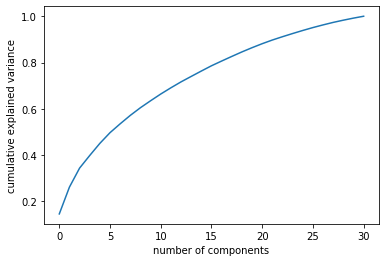

In [10]:
#Based on cummulative explained variance
pca = PCA().fit(df_clean.loc[:, features])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [11]:
x = df_clean.loc[:, features].values
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
                          
explained_variance = pca.explained_variance_ratio_

#### 10 components are chosen.
### Explained variance by each principal component.

In [12]:
explained_variance

array([0.14606813, 0.11582164, 0.08208894, 0.05451043, 0.05242332,
       0.04614275, 0.0382584 , 0.03641218, 0.03287696, 0.02994374])

In [13]:
dfScree = pd.DataFrame({'Variance explained':explained_variance,
             'Principal Components':['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']})
dfScree

,Variance explained,Principal Components
0,0.146068,PC1
1,0.115822,PC2
2,0.082089,PC3
3,0.054510,PC4
4,0.052423,PC5
5,0.046143,PC6
6,0.038258,PC7
7,0.036412,PC8
8,0.032877,PC9
9,0.029944,PC10


Text(0.5, 1.0, 'Scree plot: Percent of variance explained by each component')

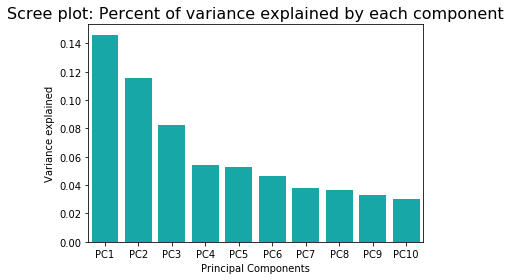

In [14]:
sns.barplot(x='Principal Components', y="Variance explained", 
           data=dfScree, color="c").set_title('Scree plot: Percent of variance explained by each component', fontsize = 16)

#### Total variance explained by all 10 components: 

In [15]:
explained_variance.sum()

0.6345464785956376

In [16]:
# Component values
principalDf

,0,1,2,3,4,5,6,7,8,9
0,-1.214135,-1.437919,-0.746771,0.858858,-1.368019,1.298596,2.320141,-3.393971,2.451012,2.723105
1,-1.550003,-1.200305,4.760674,-0.376915,-2.088893,1.217372,-2.160643,-1.511264,-0.671793,1.053896
2,-4.056236,3.278644,0.985642,1.799427,-1.320142,-1.418502,0.474008,-0.505373,0.838184,0.964191
3,-2.195134,-2.969187,3.995671,0.608164,0.657327,-3.830849,-0.829897,1.148089,-1.182663,1.543159
4,-0.743954,-1.166293,-0.611105,-1.836525,-0.226779,-2.041754,0.710229,0.825602,-0.121554,-0.798897
...,...,...,...,...,...,...,...,...,...,...
1005,-2.205738,1.659769,-2.833293,0.490483,-1.737221,-0.843480,-2.178301,1.128098,-1.167762,1.374426
1006,5.105228,0.035247,0.151142,-2.367606,2.229712,0.949079,0.259759,-1.149960,1.563989,2.214013
1007,-1.623390,-3.162176,2.739177,-0.939432,-2.364723,-2.326400,0.568713,-0.828752,-0.252660,-0.800517
1008,-1.811819,-0.335178,-1.338673,-0.357894,-0.513065,-0.600397,-0.612709,-2.793466,0.897352,0.215176


In [17]:
pca.components_

array([[ 0.11264982, -0.07622181,  0.01145595, -0.11096443, -0.03358556,
         0.04210324,  0.02963059,  0.20827588,  0.20111962, -0.10255707,
         0.22546726,  0.17878387,  0.03440948, -0.14761373,  0.1883314 ,
         0.22492095, -0.1239521 , -0.06955648,  0.15268138,  0.25952619,
         0.12309899,  0.28318469, -0.32118783,  0.35214337, -0.18130761,
        -0.04944288,  0.22025629, -0.06919118,  0.19394985, -0.24432566,
         0.24452033],
       [-0.07211835,  0.1893846 ,  0.17001135,  0.33097212,  0.25329702,
         0.31804012,  0.2596934 , -0.12843294, -0.0289017 ,  0.29447351,
         0.03226629,  0.10713028, -0.03393376, -0.03513686,  0.21197853,
         0.19358939,  0.09402807,  0.12042452,  0.20416901,  0.10710837,
         0.02448907,  0.14454637,  0.25345749,  0.05937277,  0.25733983,
         0.14474446,  0.07664029,  0.09473503,  0.22780442,  0.2327099 ,
         0.11199972],
       [-0.30758957, -0.1327771 , -0.04690281, -0.05401124,  0.21167714,
       

In [18]:
df_vectors = pd.DataFrame(pca.components_, columns=list(features))

In [19]:
# Eigenvectors
df_vectors.transpose()

,0,1,2,3,4,5,6,7,8,9
Dance,0.112650,-0.072118,-0.307590,-0.069240,-0.135077,-0.050614,-0.196689,0.282434,0.115420,0.039009
Folk,-0.076222,0.189385,-0.132777,-0.161733,0.121248,0.104255,0.157401,0.229484,0.264976,-0.179109
Country,0.011456,0.170011,-0.046903,-0.140307,0.072491,0.079033,0.180298,0.246775,0.198541,-0.205256
Classical music,-0.110964,0.330972,-0.054011,-0.175552,0.154503,-0.072164,-0.039631,0.157896,0.066381,-0.070923
Rock,-0.033586,0.253297,0.211677,0.112876,-0.267155,0.163083,-0.128651,0.062612,-0.021574,-0.070610
Metal or Hardrock,0.042103,0.318040,0.325560,0.193379,-0.189167,0.216618,-0.094206,0.108687,0.137953,-0.045324
Punk,0.029631,0.259693,0.257318,0.227183,-0.294673,0.151882,-0.176849,0.122565,0.048487,-0.090127
"Hiphop, Rap",0.208276,-0.128433,-0.305887,0.061718,-0.137800,-0.053149,-0.235152,0.264897,-0.234219,-0.360395
"Techno, Trance",0.201120,-0.028902,-0.231367,-0.153404,-0.088422,-0.032239,-0.360020,0.360093,0.193846,0.324065
Opera,-0.102557,0.294474,-0.089736,-0.135782,0.203256,-0.104161,-0.017382,0.119939,0.070876,-0.102068


In [20]:
#Component loadings: relationship of a feature wiht a each component
df_loadings = pd.DataFrame((pca.components_.T*np.sqrt(pca.explained_variance_)).transpose(), columns=list(features)).transpose()
df_loadings

,0,1,2,3,4,5,6,7,8,9
Dance,0.301694,-0.171988,-0.617550,-0.113280,-0.216721,-0.076187,-0.269588,0.377658,0.146651,0.047302
Folk,-0.204134,0.451645,-0.266577,-0.264604,0.194534,0.156930,0.215738,0.306855,0.336674,-0.217184
Country,0.030681,0.405444,-0.094167,-0.229549,0.116306,0.118965,0.247123,0.329976,0.252263,-0.248889
Classical music,-0.297180,0.789304,-0.108439,-0.287213,0.247888,-0.108626,-0.054320,0.211131,0.084342,-0.086000
Rock,-0.089947,0.604064,0.424986,0.184672,-0.428630,0.245482,-0.176333,0.083721,-0.027411,-0.085620
Metal or Hardrock,0.112759,0.758463,0.653629,0.316378,-0.303505,0.326065,-0.129121,0.145331,0.175280,-0.054959
Punk,0.079355,0.619318,0.516619,0.371684,-0.472782,0.228621,-0.242395,0.163888,0.061607,-0.109286
"Hiphop, Rap",0.557795,-0.306287,-0.614131,0.100974,-0.221090,-0.080003,-0.322308,0.354208,-0.297595,-0.437008
"Techno, Trance",0.538629,-0.068925,-0.464517,-0.250977,-0.141867,-0.048529,-0.493455,0.481500,0.246298,0.392955
Opera,-0.274664,0.702262,-0.180164,-0.222146,0.326109,-0.156788,-0.023825,0.160377,0.090054,-0.123766


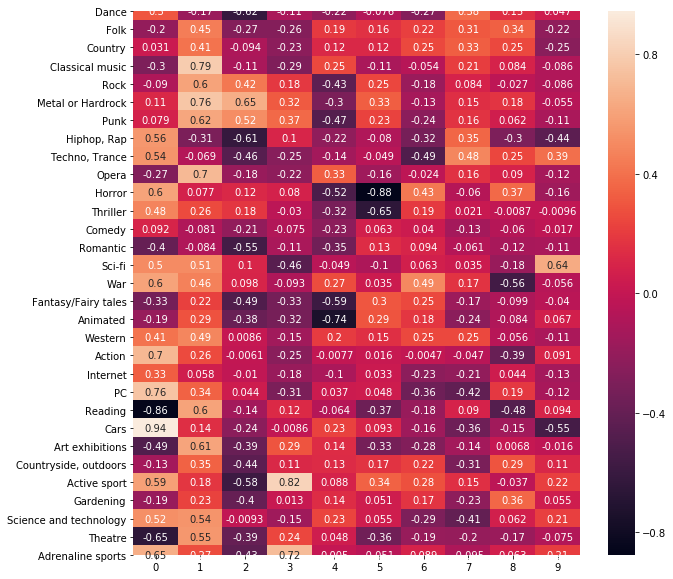

In [21]:
#Component loadings visually
plt.figure(figsize=(10,10))
sns.heatmap(df_loadings, annot = True)

### Conclusion: music, film and other hobby preferences can be grouped in 10 categories
#### Categories cannot be interpreted meaningfully based on the unrotated component loadings. To interpret them PCA was performend with Jamovi software. Hobby preferences groups:
#### Art loving, Action loving, Rock loving, Romance&Fantasy loving, Speed&Adrenaline loving 
#### Technology loving, Folk loving, Club loving, Thrill loving, Nature loving

## 2. Can we predict money spending habbits based on hobby preferences?
### 2.1. New variables are created:

A) Calculating category scores of hobby preferences

In [22]:
# Means of preferences in each category
df_clean['Art_loving'] = df_clean.loc[: , ['Reading', 'Art exhibitions', 'Theatre', 'Classical music', 'Opera']].mean(axis = 1)
df_clean['Action_loving'] = df_clean.loc[: , ['Sci-fi', 'War', 'Action', 'Western']].mean(axis = 1)
df_clean['Rock_loving'] = df_clean.loc[: , ['Rock',  'Metal or Hardrock',  'Punk']].mean(axis = 1)
df_clean['Romance&Fantasy_loving'] = df_clean.loc[: , ['Comedy', 'Romantic', 'Fantasy/Fairy tales', 'Animated']].mean(axis = 1)
df_clean['Speed&Adrenaline_loving'] = df_clean.loc[: , ['Cars', 'Active sport', 'Adrenaline sports', 'Hiphop, Rap']].mean(axis = 1)
df_clean['Technology_loving'] = df_clean.loc[: , ['Internet',  'PC', 'Science and technology']].mean(axis = 1)
df_clean['Folk_loving'] = df_clean.loc[: , ['Folk',  'Country']].mean(axis = 1)
df_clean['Club_loving'] = df_clean.loc[: , ['Dance', 'Techno, Trance']].mean(axis = 1)
df_clean['Thrill_loving'] = df_clean.loc[: , ['Horror',  'Thriller']].mean(axis = 1)
df_clean['Nature_loving'] = df_clean.loc[: , ['Countryside, outdoors', 'Gardening',]].mean(axis = 1)

In [23]:
df_clean.head(10)

,Dance,Folk,Country,Classical music,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Techno, Trance",Opera,...,Art_loving,Action_loving,Rock_loving,Romance&Fantasy_loving,Speed&Adrenaline_loving,Technology_loving,Folk_loving,Club_loving,Thrill_loving,Nature_loving
0,2.0,1.0,2.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,...,1.8,2.00,2.333333,4.75,2.75,4.000000,1.5,1.5,3.0,5.0
1,2.0,1.0,1.0,1.0,5.0,4.0,4.0,1.0,1.0,1.0,...,2.0,2.50,4.333333,3.75,1.50,3.666667,1.0,1.5,2.0,1.0
2,2.0,2.0,3.0,4.0,5.0,3.0,4.0,1.0,1.0,3.0,...,4.4,2.25,4.000000,4.00,2.25,2.666667,2.5,1.5,3.5,3.0
3,2.0,1.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,1.0,...,2.6,2.50,2.333333,2.25,1.25,2.333333,1.0,2.0,4.0,1.0
4,4.0,3.0,2.0,4.0,3.0,1.0,2.0,5.0,2.0,2.0,...,2.8,2.75,2.000000,3.75,2.75,2.333333,2.5,3.0,4.0,4.0
5,2.0,3.0,2.0,3.0,5.0,5.0,3.0,4.0,1.0,3.0,...,2.4,3.00,4.333333,3.50,4.00,3.666667,2.5,1.5,5.0,3.5
6,5.0,3.0,1.0,2.0,3.0,1.0,1.0,3.0,5.0,2.0,...,2.2,1.75,1.666667,4.50,2.75,2.333333,2.0,5.0,1.5,3.5
7,3.0,2.0,1.0,2.0,5.0,1.0,2.0,3.0,3.0,2.0,...,1.8,2.50,2.666667,3.75,2.75,3.666667,1.5,3.0,4.0,1.5
8,3.0,1.0,1.0,2.0,5.0,5.0,1.0,1.0,1.0,1.0,...,2.8,2.75,3.666667,4.25,1.00,1.000000,1.0,2.0,3.0,2.5
9,2.0,5.0,2.0,2.0,5.0,2.0,3.0,2.0,1.0,2.0,...,3.4,1.75,3.333333,4.50,2.25,3.000000,3.5,1.5,1.5,2.5


B) Creating categorical variables of spending habbits: likes/dislikes to buy in big shopping centres, spends/does not spend money for brands, entertainment, looks, gadgets, healthy food.

In [24]:
#Spending habbits: spends/does not spend (0/1). Answers 1-3 grouped as does not spend (0), answers 4-5 grouped as spends (1)
df_clean['Pred_Shopping_centres'] = df_clean['Shopping centres'].apply(lambda x: 1 if x > 3 else 0)
df_clean['Pred_Branded_clothing'] = df_clean['Branded clothing'].apply(lambda x: 1 if x > 3 else 0)
df_clean['Pred_Entertainment_spending'] = df_clean['Entertainment spending'].apply(lambda x: 1 if x > 3 else 0)
df_clean['Pred_Spending on looks'] = df_clean['Spending on looks'].apply(lambda x: 1 if x > 3 else 0)
df_clean['Pred_Spending on gadgets'] = df_clean['Spending on gadgets'].apply(lambda x: 1 if x > 3 else 0)
df_clean['Pred_Spending on healthy eating'] = df_clean['Spending on healthy eating'].apply(lambda x: 1 if x > 3 else 0)

In [25]:
df_clean.head()

,Dance,Folk,Country,Classical music,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Techno, Trance",Opera,...,Folk_loving,Club_loving,Thrill_loving,Nature_loving,Pred_Shopping_centres,Pred_Branded_clothing,Pred_Entertainment_spending,Pred_Spending on looks,Pred_Spending on gadgets,Pred_Spending on healthy eating
0,2.0,1.0,2.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,...,1.5,1.5,3.0,5.0,1,1,0,0,0,0
1,2.0,1.0,1.0,1.0,5.0,4.0,4.0,1.0,1.0,1.0,...,1.0,1.5,2.0,1.0,1,0,1,0,1,0
2,2.0,2.0,3.0,4.0,5.0,3.0,4.0,1.0,1.0,3.0,...,2.5,1.5,3.5,3.0,1,0,1,0,1,0
3,2.0,1.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,1.0,...,1.0,2.0,4.0,1.0,1,0,0,1,1,0
4,4.0,3.0,2.0,4.0,3.0,1.0,2.0,5.0,2.0,2.0,...,2.5,3.0,4.0,4.0,0,1,0,0,0,1


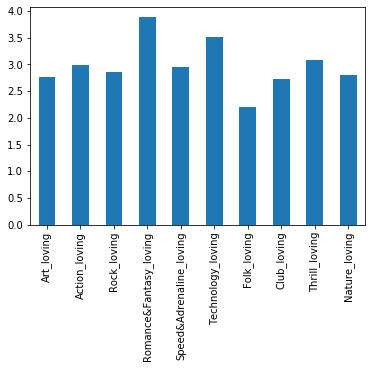

In [67]:
# descriptives of independent variables: means of prefencences in each category. 
#Young people indicate that they have:
# strongest preferences for Romance and fantasy movies, Tecnologies; 
# weakest preferences for Folk and country music.
df_indep = df_clean[['Art_loving', 'Action_loving', 'Rock_loving',  'Romance&Fantasy_loving', 'Speed&Adrenaline_loving',
 'Technology_loving', 'Folk_loving', 'Club_loving', 'Thrill_loving', 'Nature_loving']].mean()
df_indep.plot(kind = 'bar')

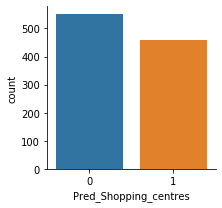

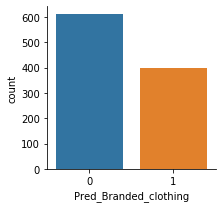

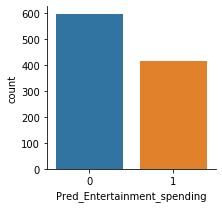

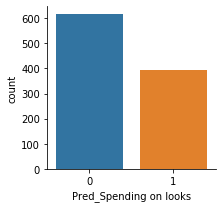

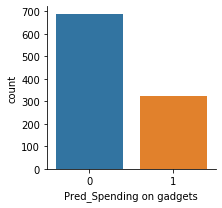

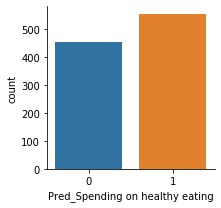

In [26]:
# Number of people (observations) in categories of the dependent variables
# We can see than distribution in categories are more or less even, except Spending on gadgets (2:1) 
sns.catplot(x = 'Pred_Shopping_centres', kind = 'count', data = df_clean, height = 3)
sns.catplot(x = 'Pred_Branded_clothing', kind = 'count', data = df_clean, height = 3)
sns.catplot(x = 'Pred_Entertainment_spending', kind = 'count', data = df_clean, height = 3)
sns.catplot(x = 'Pred_Spending on looks', kind = 'count', data = df_clean, height = 3)
sns.catplot(x = 'Pred_Spending on gadgets', kind = 'count', data = df_clean, height = 3)
sns.catplot(x = 'Pred_Spending on healthy eating', kind = 'count', data = df_clean, height = 3)

### 2.2. Predictions: logistic regression

In [27]:
list(df_clean.columns)

['Dance',
 'Folk',
 'Country',
 'Classical music',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Techno, Trance',
 'Opera',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Western',
 'Action',
 'Internet',
 'PC',
 'Reading',
 'Cars',
 'Art exhibitions',
 'Countryside, outdoors',
 'Active sport',
 'Gardening',
 'Science and technology',
 'Theatre',
 'Adrenaline sports',
 'Smoking',
 'Alcohol',
 'Healthy eating',
 'Internet usage',
 'Finances',
 'Shopping centres',
 'Branded clothing',
 'Entertainment spending',
 'Spending on looks',
 'Spending on gadgets',
 'Spending on healthy eating',
 'Age',
 'Gender',
 'Education',
 'Art_loving',
 'Action_loving',
 'Rock_loving',
 'Romance&Fantasy_loving',
 'Speed&Adrenaline_loving',
 'Technology_loving',
 'Folk_loving',
 'Club_loving',
 'Thrill_loving',
 'Nature_loving',
 'Pred_Shopping_centres',
 'Pred_Branded_clothing',
 'Pred_Entertainment_spending',
 'Pred_Spending on looks',

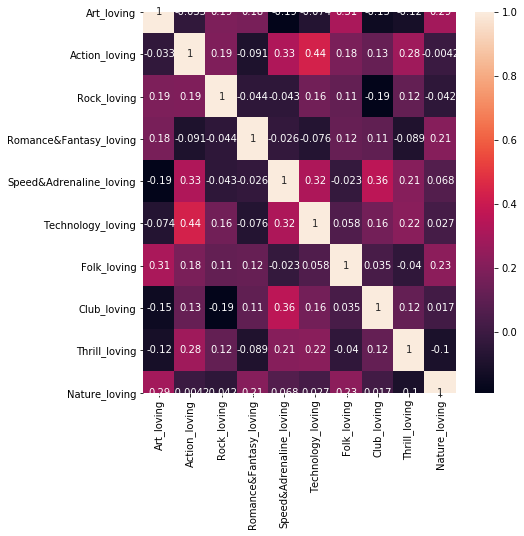

In [28]:
# Multicollinearity of predictors
plt.figure(figsize=(7,7))
sns.heatmap(df_clean[['Art_loving', 'Action_loving', 'Rock_loving', 'Romance&Fantasy_loving', 'Speed&Adrenaline_loving',
 'Technology_loving', 'Folk_loving', 'Club_loving', 'Thrill_loving', 'Nature_loving']].corr(), annot = True)

#### Each spending habbit is predicted based on hobby preferences

Pred_Shopping_centres
X_train shape: (808, 10)
X_test shape: (202, 10)
Accuracy : 0.6336633663366337
Precision : 0.6049382716049383
Recall : 0.5384615384615384


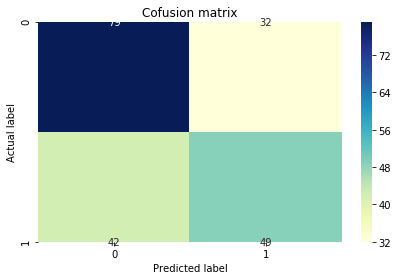

Pred_Branded_clothing
X_train shape: (808, 10)
X_test shape: (202, 10)
Accuracy : 0.6534653465346535
Precision : 0.6444444444444445
Recall : 0.3493975903614458


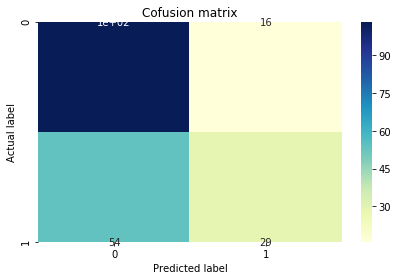

Pred_Entertainment_spending
X_train shape: (808, 10)
X_test shape: (202, 10)
Accuracy : 0.5643564356435643
Precision : 0.390625
Recall : 0.33783783783783783


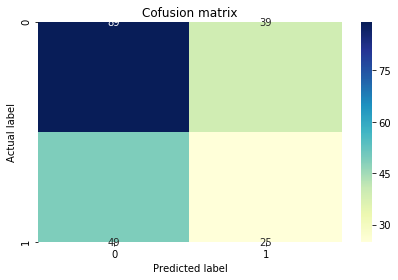

Pred_Spending on looks
X_train shape: (808, 10)
X_test shape: (202, 10)
Accuracy : 0.6188118811881188
Precision : 0.6153846153846154
Recall : 0.3595505617977528


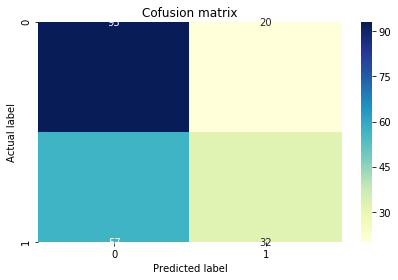

Pred_Spending on gadgets
X_train shape: (808, 10)
X_test shape: (202, 10)
Accuracy : 0.7178217821782178
Precision : 0.6
Recall : 0.2857142857142857


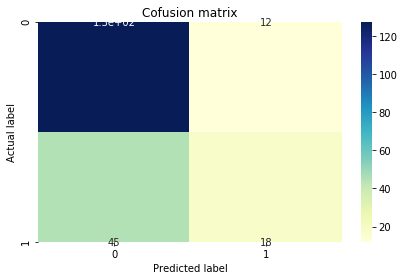

Pred_Spending on healthy eating
X_train shape: (808, 10)
X_test shape: (202, 10)
Accuracy : 0.6089108910891089
Precision : 0.6027397260273972
Recall : 0.8073394495412844


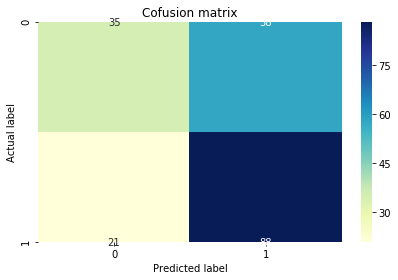

In [29]:
dep_vars = ['Pred_Shopping_centres',
 'Pred_Branded_clothing',
 'Pred_Entertainment_spending',
 'Pred_Spending on looks',
 'Pred_Spending on gadgets',
 'Pred_Spending on healthy eating']

for dep_var in dep_vars:
    print(dep_var)
    df_prediction = df_clean[['Art_loving', 'Action_loving', 'Rock_loving', 'Romance&Fantasy_loving', 'Speed&Adrenaline_loving',
 'Technology_loving', 'Folk_loving', 'Club_loving', 'Thrill_loving', 'Nature_loving', dep_var]]
    
    X = df_prediction.drop(dep_var, axis = 1)
    y = df_prediction[dep_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    print('X_train shape:', X_train.shape)
    print('X_test shape:', X_test.shape)
    
    logistic = LogisticRegression(solver = 'lbfgs')
    logistic.fit(X_train, y_train)
    predictions = logistic.predict(X_test)
    print('Accuracy :', metrics.accuracy_score(y_test, predictions))
    print('Precision :', metrics.precision_score(y_test, predictions))
    print('Recall :', metrics.recall_score(y_test, predictions))
    
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu')
    plt.title('Cofusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel ('Predicted label')
    plt.tight_layout()
    plt.show()
    
    #sns.pairplot(df_prediction, hue = dep_var)
    #plt.show()

### Conclusions: 
#### Preference categories are not very good predictors of the spending habbits (Accuracy 0.56-0.71; Precision 0.39-0.64; Recall 0.29-0.81). 
#### Prediction of spending on entertainment is least accurate.
#### Prediction of spending on healthy food is the best: 
#### Total classification accuracy is about 60%. 
#### 81% of those who spend on healthy food are identified correctly. But... only 60% of those who are classified as spending tend to actually spend on healthy food.